In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as ticker
from adjustText import adjust_text
import textwrap

In [72]:
df = pd.read_csv("C:/Users/laiye/Kaggle/netflix_titles.csv")

In [ ]:
df.head(10) #check the format of the data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [ ]:
#check the stats of the data
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
(8807, 12)


In [ ]:
print(df.isna().sum()) #check for na values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


To avoid missing important values from removal of NAs, we remove only NAs that are from important columns used in our data visualisation. We remove for only that visualisation instead of from the whole dataset as other variables may not have missing values, removal of NAs will cause values in these variables to be removed as well since the entire row is removed.

In [76]:
type_count = df['type'].value_counts()
type_count

Movie      6131
TV Show    2676
Name: type, dtype: int64

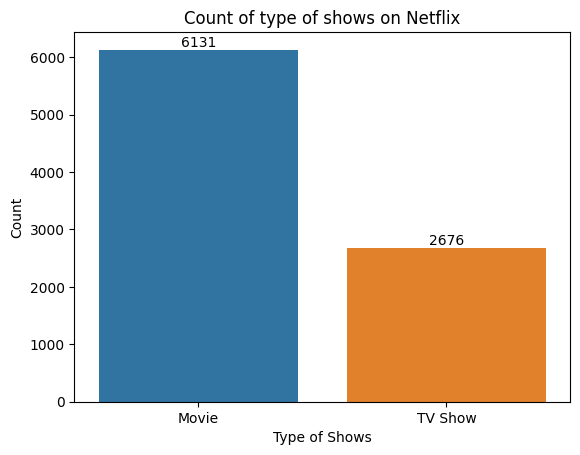

In [ ]:
ax = sns.countplot(df, x = 'type')
ax.set(xlabel = 'Type of Shows', ylabel = 'Count', title = 'Count of Type of Shows on Netflix')
ax.bar_label(ax.containers[0])
plt.show()

The graph shows that the number of Movies on Netflix is more than twice than that of TV Shows.

In [79]:
country_breakdown = df['country'].dropna().value_counts()
top_10 = country_breakdown.nlargest(10)

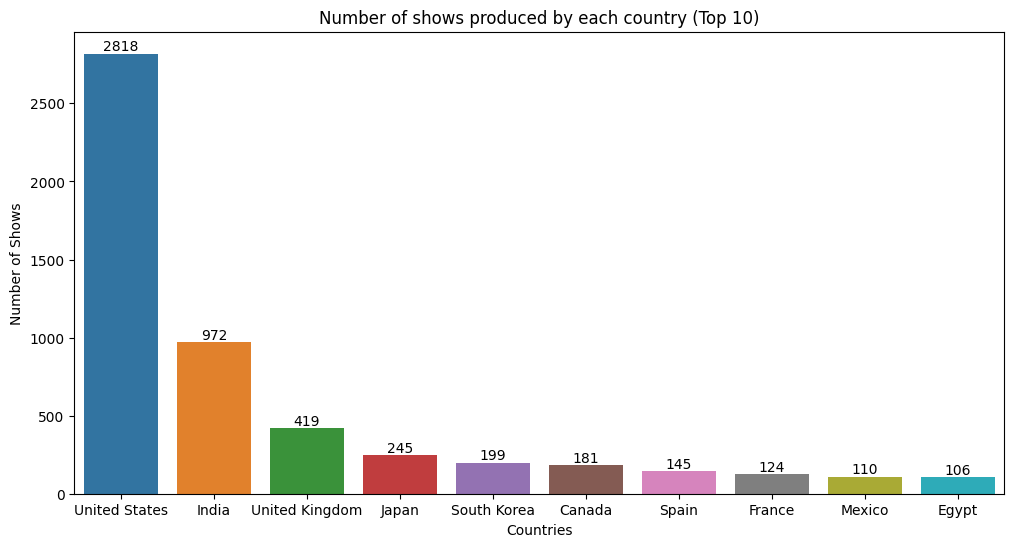

In [ ]:
plt.figure(figsize = (12, 6))
ax = sns.barplot(x= top_10.index, y = top_10.values)
ax.bar_label(ax.containers[0])
ax.set(xlabel = 'Countries', ylabel = 'Number of Shows', title = 'Number of Shows Released by Each Country (Top 10)')
plt.show()

In [100]:
Proportion_of_top_10 = round(top_10.values.sum() / country_breakdown.values.sum(), 2)
Proportion_of_top_10

0.67

Amongst all the shows produced, US produces the most number of shows at 2818 shows, followed by India at 972 shows and UK at 419 shows. Following are Japan, South Korea, Canada, Spain, France, Mexico and Egypt. These are the top 10 countries that produces the most number of shows. The shows produced by top 10 countries fill up about two-third of the shows produced.

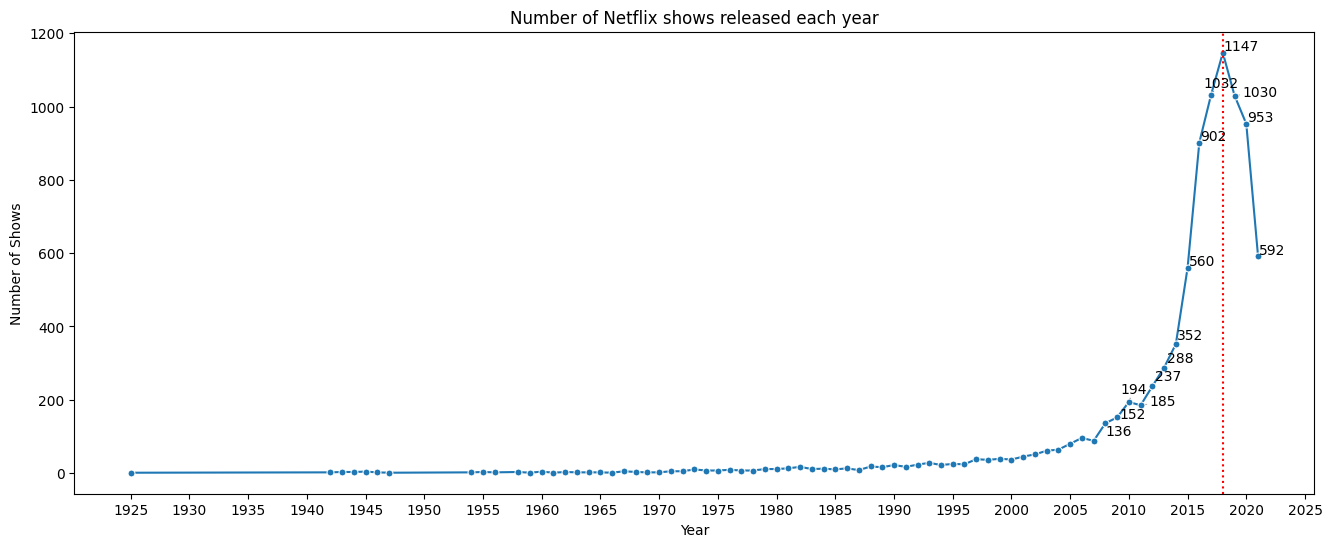

In [ ]:
plt.figure(figsize = (16, 6))
ax = sns.lineplot(x = df['release_year'].value_counts().index, y = df['release_year'].value_counts().values, marker = 'o', markersize = 5)
ax.set(xlabel = "Year", ylabel = "Number of Shows", title = "Number of Netflix Shows Released Each Year")
texts = []
for year, count in df['release_year'].value_counts().items():
    if count > 100:
        texts.append(plt.text(year, count, f'{count}'))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
max_year = df['release_year'].value_counts().idxmax()
ax.axvline(x=max_year, color='red', linestyle=':', linewidth=1.5, label=f'Peak: {max_year}')
plt.show()

There has been an increasing trend in the number of shows produced over the years but from 2018 onwwards there was a sudden drastic drop. From the trend, we could also see that Netflix gained popularity around the 2010s as the number of shows released greatly increased during this period of time. At the same time, it also proved that there was over hype of Netflix from 2015-2018 which resulted in the large decrease in the number of shows released from 2019-2021 indicating that the demand for the shows could not catch up with the supply of shows and Netflix had to cut the number of shows that they acquire and release so that they will not incur losses.

In [82]:
print(df['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']


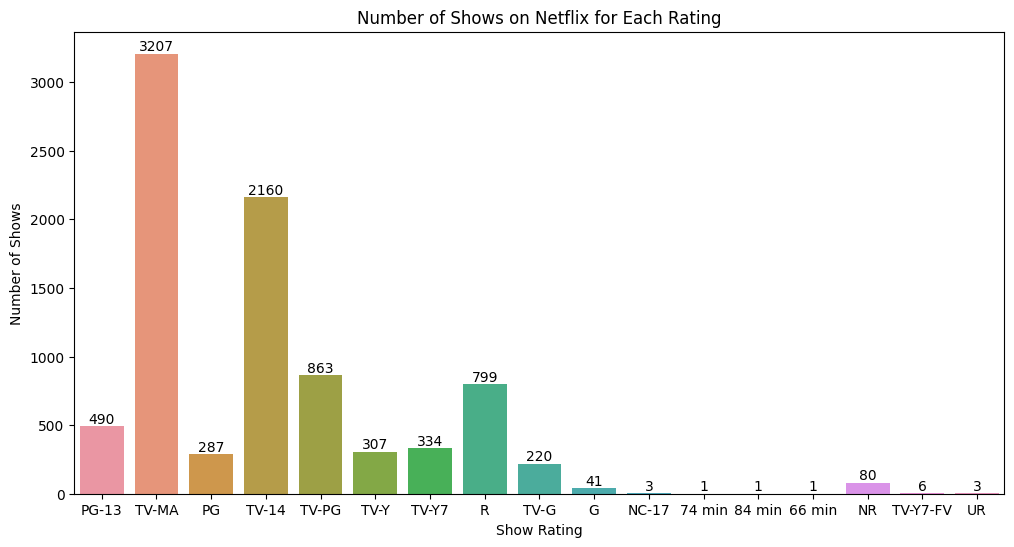

In [83]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(df, x = 'rating')
ax.set(xlabel = 'Show Rating', ylabel = 'Number of Shows', title = 'Number of Shows on Netflix for Each Rating')
ax.bar_label(ax.containers[0])
plt.show()

For this section, we may need more information on what each of these rating meant to better plot the graph because some of those ratings with single digits count may be able to combine with other ratings. Nonetheless, majority of the shows have rating of TV-MA, followed by TV-14 then TV-PG and R.

In [84]:
series_list = df['listed_in'].str.split(',')
series_list = series_list.explode()
series_count = series_list.str.strip().value_counts()
series_count_10 = series_count.nlargest(10)
series_count_10

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: listed_in, dtype: int64

In [101]:
series_count

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

[Text(0.5, 0, 'Genre of Shows'),
 Text(0, 0.5, 'Number of Shows'),
 Text(0.5, 1.0, 'Number of Shows Listed in Each Genre (Top 10)')]

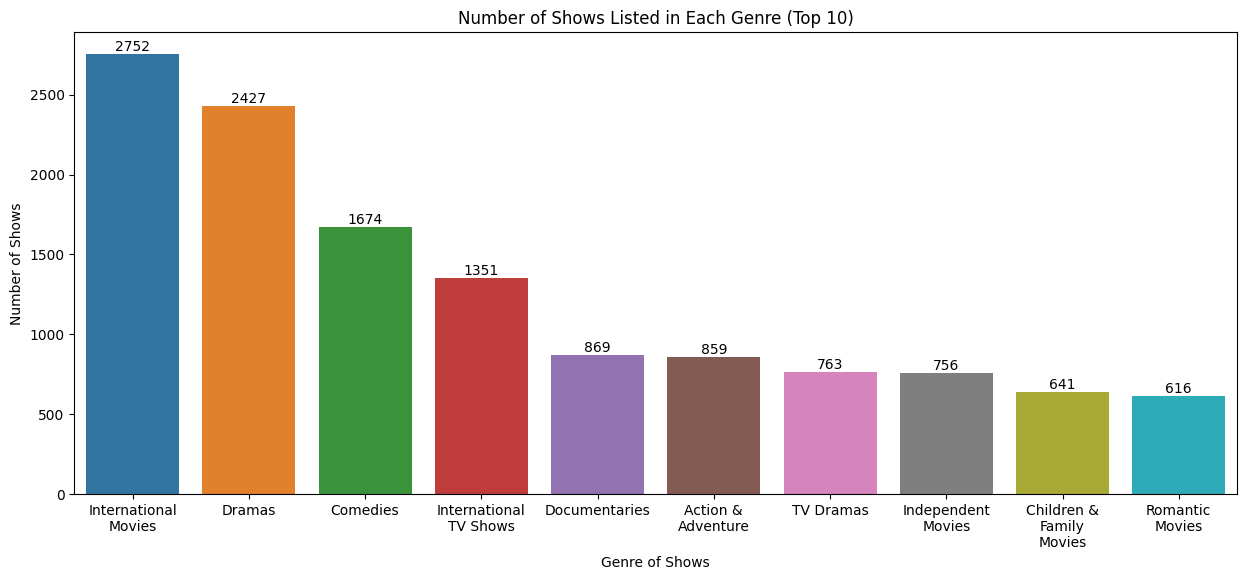

In [85]:
plt.figure(figsize = (15, 6))
ax = sns.barplot(x = series_count_10.index, y = series_count_10.values)
wrapped_labels = [textwrap.fill(label.get_text(), width=10, break_long_words=False) for label in ax.get_xticklabels()]
ax.set_xticklabels(wrapped_labels)
ax.bar_label(ax.containers[0])
ax.set(xlabel = "Genre of Shows", ylabel = "Number of Shows", title = "Number of Shows Listed in Each Genre (Top 10)")

The number of international movies and dramas are the greatest in the 2000s, followed by comedies and international tv shows in the 1000s and the rest in top 10 are between 900 and 600.

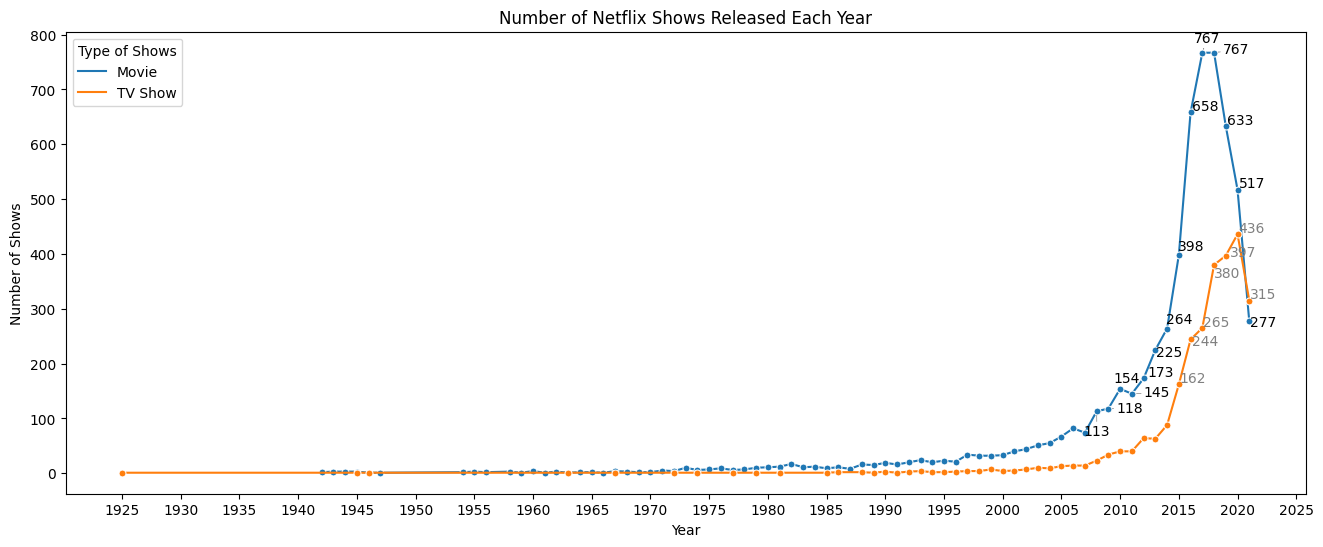

In [86]:
plt.figure(figsize = (16, 6))
type_by_year = df.groupby(['type', 'release_year']).size().reset_index(name = 'count')
ax = sns.lineplot(data = type_by_year, x = 'release_year', y = 'count', hue = 'type', marker = 'o', markersize = 5)
ax.set(xlabel = "Year", ylabel = "Number of Shows", title = "Number of Netflix Shows Released Each Year")
plt.legend(title = "Type of Shows")
texts = []
color_map = {'Movie': 'black', 'TV Show': 'grey'}
for type, year, count in type_by_year.values:
    if count > 100:
        texts.append(plt.text(year, count, f'{count}', color = color_map.get(type)))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.show()

Looking at the comparison of the increase in the number of shows, we can tell that the demand for shows on Netflix falls more on Movies since the increase in the number of movies is much larger than that of TV shows.

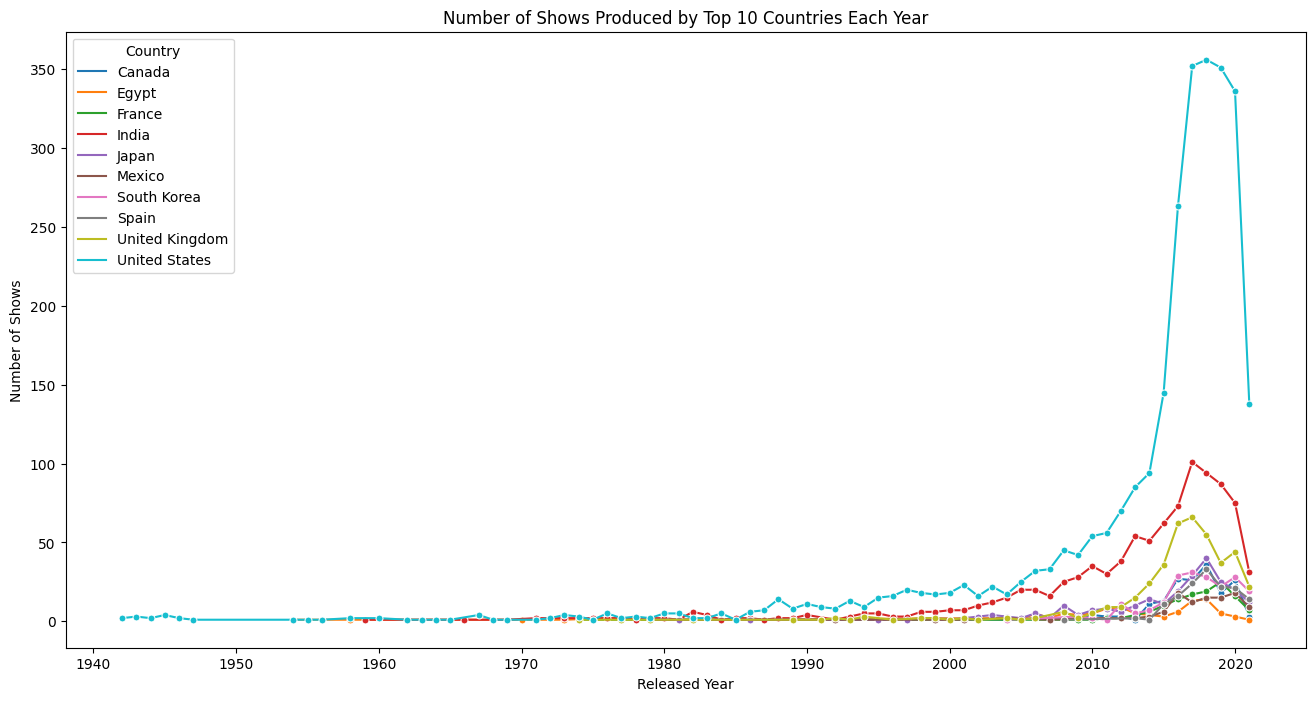

In [ ]:
country_subset = df[df['country'].isin(top_10.index)]
country_by_year = country_subset.groupby(['country', 'release_year']).size().reset_index(name = 'count')
plt.figure(figsize = (16, 8))
ax = sns.lineplot(data = country_by_year, x = 'release_year', y = 'count', hue = 'country', marker = 'o', markersize = 5)
ax.set(xlabel = 'Released Year', ylabel = 'Number of Shows', title = 'Number of Shows Released by Top 10 Countries Each Year')
plt.legend(title = 'Country')
plt.show()

This graph shows that the number of shows produced by US increased the most during the peak period with at least 3 times more shows than India which comes in at second place. For 4th to 10th place, this graph makes it hard to visualise, hence another graph is created below to zoom in on that.

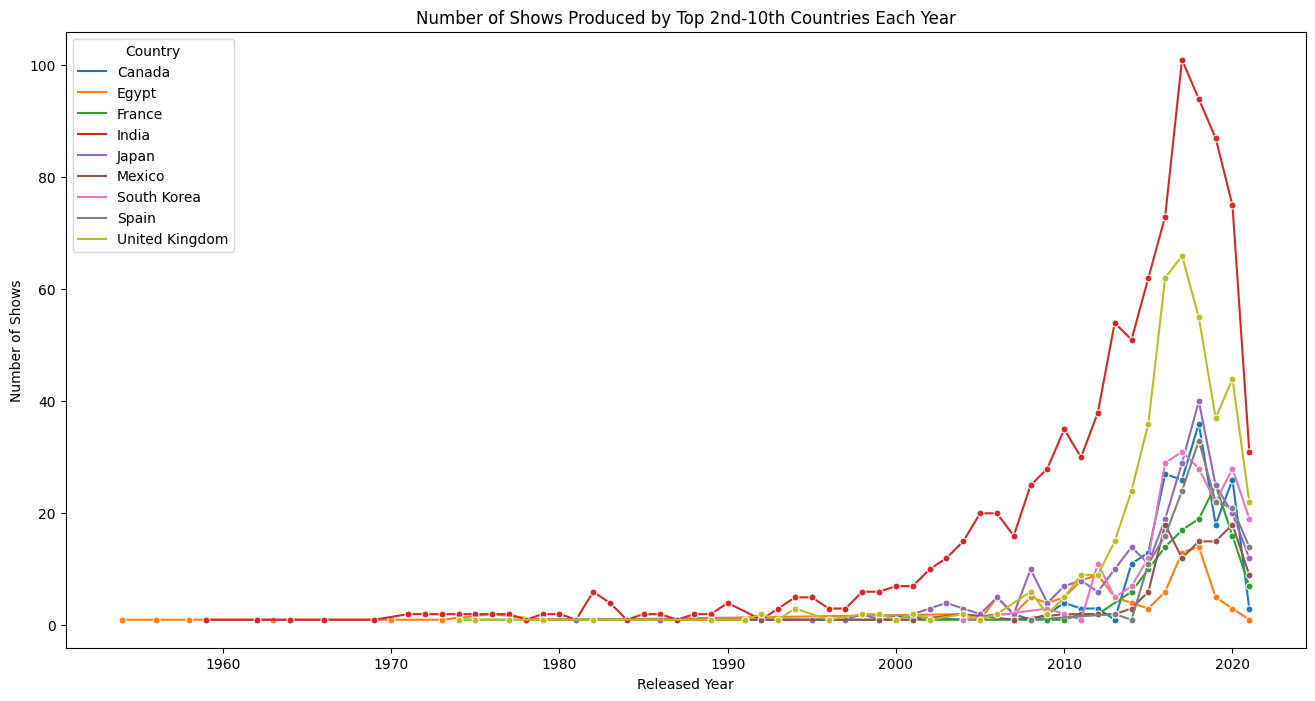

In [ ]:
enlarged = top_10[1:]
enlarged_subset = df[df['country'].isin(enlarged.index)]
enlarged_by_year = enlarged_subset.groupby(['country', 'release_year']).size().reset_index(name = 'count')
plt.figure(figsize= (16, 8))
ax = sns.lineplot(data = enlarged_by_year, x = 'release_year', y = 'count', hue = 'country', marker = 'o', markersize = 5)
ax.set(xlabel = 'Released Year', ylabel = 'Number of Shows', title = 'Number of Shows Released by Top 2nd-10th Countries Each Year')
plt.legend(title = 'Country')
plt.show()

From this we can see that India, UK and South Korea had similar trends of producing the maximum number of shows in 2017 while Japan, Canada, Spain and Egypt had similar trends as US of producing most number of shows in 2018. Only France and Mexico have a slightly different trend. This could suggest that while all the countries generally noticed the ongoing excitement over Netflix Shows, India, UK and South Korea were amongst the first to see that the hype could not last so much to justify the amount of resources spent on all the shows produced as indicated by the earlier decrease in the number of shows. While France and Mexico were the latest to exit the hype.

In [89]:
split = df
split['listed_in'] = split['listed_in'].str.split(',')
filtered_series = split.explode('listed_in')
filtered_series['listed_in'] = filtered_series['listed_in'].str.strip()

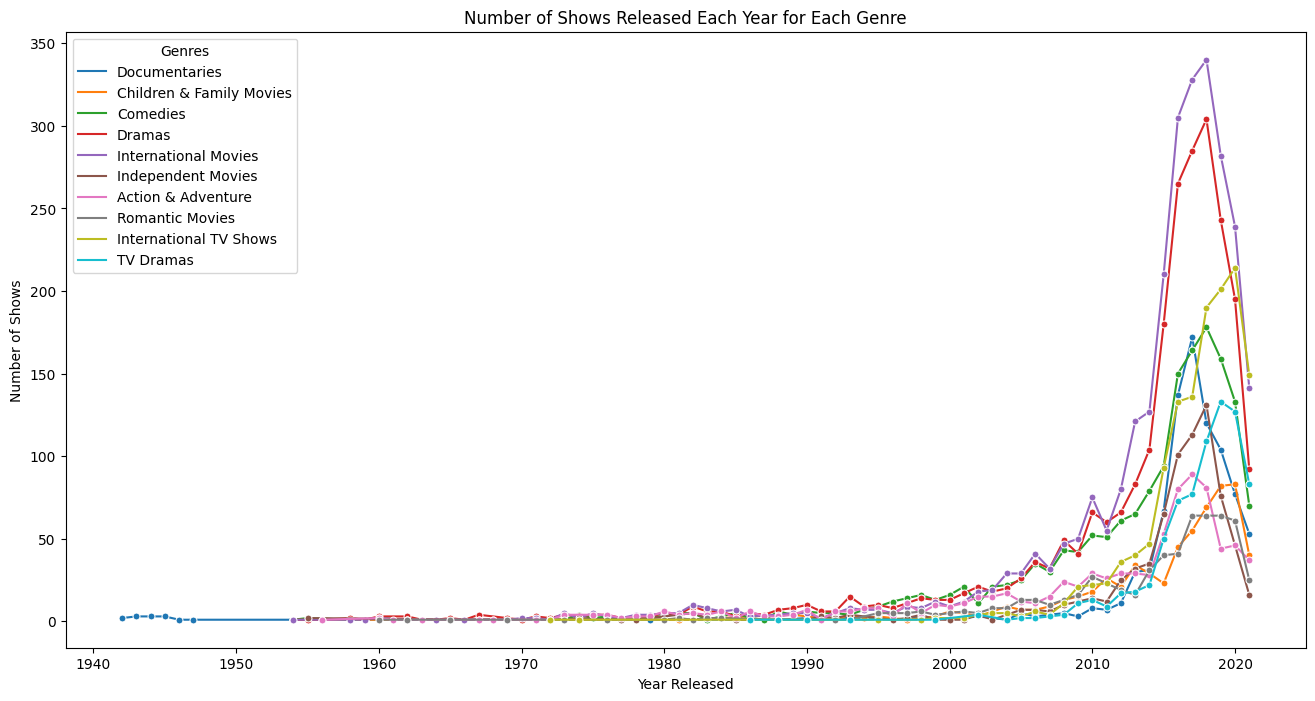

In [90]:
filtered_series_10 = filtered_series[filtered_series['listed_in'].isin(series_count_10.index)]
group_by_series = filtered_series_10.groupby(['release_year', 'listed_in']).size().reset_index(name = 'count')
plt.figure(figsize = (16, 8))
ax = sns.lineplot(data = group_by_series, x = 'release_year', y = 'count', hue = 'listed_in', marker = 'o', markersize = 5)
ax.set(xlabel = 'Year Released', ylabel = 'Number of Shows', title = 'Number of Shows Released Each Year for Each Genre')
plt.legend(title = 'Genres')
plt.show()

The number of International Movies and Dramas released were the top 2 and were quite similar but towards 2021, the numbers dropped greatly for both. Both documentaries and Independent Movies also dropped greatly from their peak. This could suggest that the demand for these genres of shows were not as high as predicted hence Netflix chose to largely decrease the number of such genre of shows.

C:\Users\laiye\AppData\Local\Temp\ipykernel_17020\1328256513.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_labels)


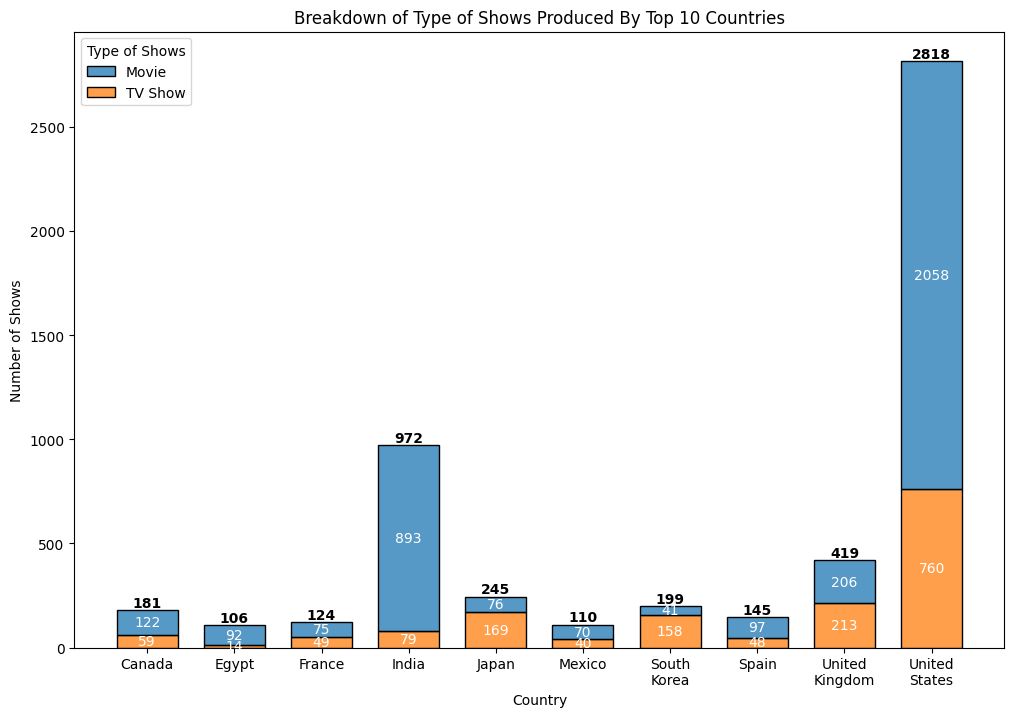

In [91]:
plt.figure(figsize = (12, 8))
type_breakdown_by_country = country_subset.groupby(['country', 'type']).size().reset_index(name = 'count')
ax = sns.histplot(data = type_breakdown_by_country, x = 'country', hue = 'type', weights = 'count', multiple = 'stack', shrink = 0.7)
wrapped_labels = [textwrap.fill(label.get_text(), width=10, break_long_words=False) for label in ax.get_xticklabels()]
ax.set_xticklabels(wrapped_labels)
ax.set(xlabel = 'Country', ylabel = 'Number of Shows', title = 'Breakdown of Type of Shows Produced By Top 10 Countries')
for c in ax.containers:
    ax.bar_label(c, label_type = 'center', fontsize = 10, color = 'white')
ax.bar_label(ax.containers[-1], label_type = 'edge', fontsize = 10, fontweight = 'bold')
sns.move_legend(ax, loc = 'upper left', title = 'Type of Shows')
plt.show()

Most of the top 10 countries produce more movie than TV shows except for Japan, South Korea and UK where Japan has 2 times more TV shows than Movies, South Korea 3 times while UK has a relatively balanced number with TV shows slightly more than Movies. The remaining countries all has close to 2 times or more movies than TV shows with India having the greatest ratio of about 10 times more movies than TV shows.

In [92]:
country_subset['listed_in'] = country_subset['listed_in'].str.split(',')
series_country = country_subset.explode('listed_in')
series_country['listed_in'] = series_country['listed_in'].str.strip()
series_country['listed_in'] = series_country['listed_in'].apply(lambda x: x if x in series_count_10.index else 'Others')

C:\Users\laiye\AppData\Local\Temp\ipykernel_17020\1869883475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_subset['listed_in'] = country_subset['listed_in'].str.split(',')


C:\Users\laiye\AppData\Local\Temp\ipykernel_17020\421409446.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(wrapped_labels)


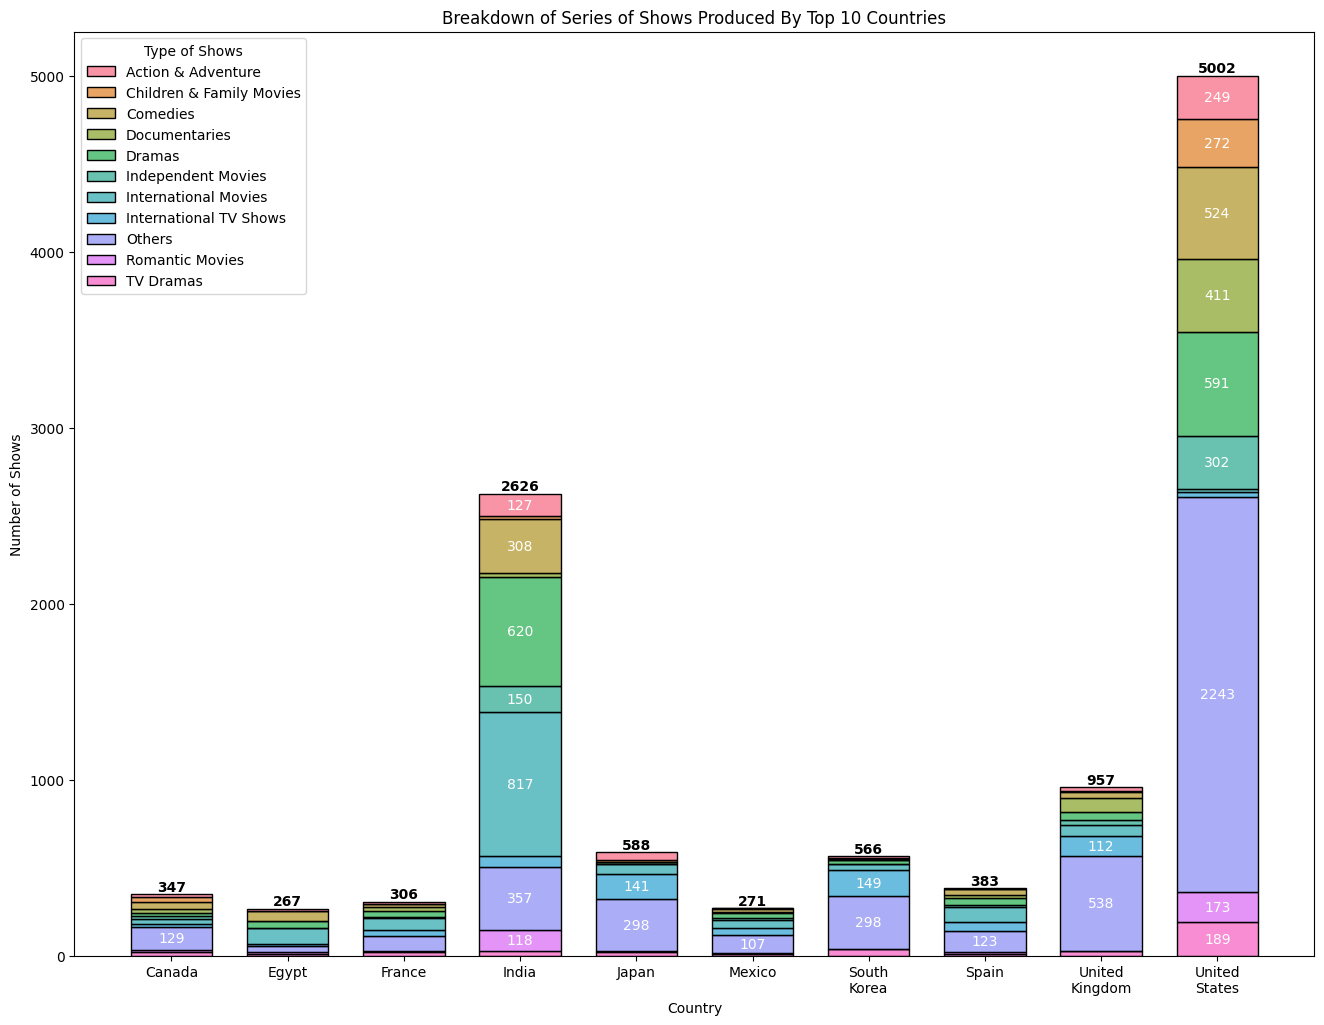

In [97]:
plt.figure(figsize = (16, 12))
series_breakdown_by_country = series_country.groupby(['country', 'listed_in']).size().reset_index(name = 'count')
ax = sns.histplot(data = series_breakdown_by_country, x = 'country', hue = 'listed_in', weights = 'count', multiple = 'stack', shrink = 0.7)
wrapped_labels = [textwrap.fill(label.get_text(), width=10, break_long_words=False) for label in ax.get_xticklabels()]
ax.set_xticklabels(wrapped_labels)
ax.set(xlabel = 'Country', ylabel = 'Number of Shows', title = 'Breakdown of Series of Shows Produced By Top 10 Countries')
for c in ax.containers:
    labels = [f'{v:.0f}' if v > 100 else "" for v in c.datavalues]
    ax.bar_label(c, labels = labels, label_type = 'center', fontsize = 10, color = 'white')
ax.bar_label(ax.containers[-1], label_type = 'edge', fontsize = 10, fontweight = 'bold')
sns.move_legend(ax, loc = 'upper left', title = 'Type of Shows')
plt.show()

All other genres not within top 10 are listed under others to prevent the graph from overflowing.
Generally, the top 10 countries all produce a wide spread of genres quite evenly except for india which seems to lay a larger emphasise on dramas and international movies. While Japan, South Korea and UK have slightly more emphasis on International.